In [31]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [33]:
movies = pd.read_csv(r"Movie+Assignment+Data.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
# Write your code for inspection here
movies.shape

(5043, 28)

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [5]:
# Write your code for column-wise null count here
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
# Write your code for row-wise null count here
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [7]:
# Write your code for column-wise null percentages here
round(100*(movies.isnull().sum()/len(movies.index))),2

(color                         0.0
 director_name                 2.0
 num_critic_for_reviews        1.0
 duration                      0.0
 director_facebook_likes       2.0
 actor_3_facebook_likes        0.0
 actor_2_name                  0.0
 actor_1_facebook_likes        0.0
 gross                        18.0
 genres                        0.0
 actor_1_name                  0.0
 movie_title                   0.0
 num_voted_users               0.0
 cast_total_facebook_likes     0.0
 actor_3_name                  0.0
 facenumber_in_poster          0.0
 plot_keywords                 3.0
 movie_imdb_link               0.0
 num_user_for_reviews          0.0
 language                      0.0
 country                       0.0
 content_rating                6.0
 budget                       10.0
 title_year                    2.0
 actor_2_facebook_likes        0.0
 imdb_score                    0.0
 aspect_ratio                  7.0
 movie_facebook_likes          0.0
 dtype: float64,
 2)

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [34]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies = movies.drop(["color","director_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes","actor_2_name","cast_total_facebook_likes","actor_3_name","duration","facenumber_in_poster","content_rating","country","movie_imdb_link","aspect_ratio","plot_keywords"],axis=1)

In [10]:
movies.shape

(5043, 13)

-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [35]:
# Write your code for dropping the rows here
movies = movies[~np.isnan(movies["gross"])]

In [36]:
movies = movies[~np.isnan(movies["budget"])]

In [38]:
movies.shape

(3891, 13)

-  ### Subtask 2.4: Drop unecessary rows

Some of the rows might have greater than five NaN values. Such rows aren't of much use for the analysis and hence, should be removed.

In [39]:
# Write your code for dropping the rows here
movies = movies[movies.isnull().sum(axis=1)<=5]

In [40]:
movies.shape

(3891, 13)

-  ### Subtask 2.5: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [41]:
# Write your code for filling the NaN values in the 'language' column here
movies["language"] = movies["language"].fillna("English")

In [42]:
movies.isnull().sum()

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              3
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

-  ### Subtask 2.6: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [ ]:
# Write your code for checking number of retained rows here


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [43]:
# Write your code for unit conversion here
movies["gross"] = movies["gross"].floordiv(1000000)

In [44]:
movies["budget"] = movies["budget"].floordiv(1000000)

-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3891 non-null   object 
 1   num_critic_for_reviews  3890 non-null   float64
 2   gross                   3891 non-null   float64
 3   genres                  3891 non-null   object 
 4   actor_1_name            3888 non-null   object 
 5   movie_title             3891 non-null   object 
 6   num_voted_users         3891 non-null   int64  
 7   num_user_for_reviews    3891 non-null   float64
 8   language                3891 non-null   object 
 9   budget                  3891 non-null   float64
 10  title_year              3891 non-null   float64
 11  imdb_score              3891 non-null   float64
 12  movie_facebook_likes    3891 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 425.6+ KB


In [47]:
# Write your code for creating the profit column here
movies["Profit"] = movies["gross"]-movies["budget"]

In [49]:
# Write your code for sorting the dataframe here
movies = movies.sort_values("Profit",ascending = False)

In [50]:
top10 = movies.iloc[:10]

In [51]:
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0
794,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
17,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
509,Roger Allers,186.0,422.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.0
240,George Lucas,320.0,474.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.0
66,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have notice a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`.

In [52]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(inplace=True)

In [54]:
# Write code for repeating subtask 2 here
top10 = movies.iloc[:10]

In [55]:
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0
794,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
509,Roger Allers,186.0,422.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.0
240,George Lucas,320.0,474.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.0
66,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0
439,Gary Ross,673.0,407.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.0


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [83]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
movies.sort_values("imdb_score",ascending=False,inplace=True)

In [94]:
IMDb_Top_250 = movies[movies.num_voted_users>25000]

In [95]:
IMDb_Top_250.shape

(2609, 14)

In [96]:
IMDb_Top_250 = IMDb_Top_250.iloc[:250]

In [97]:
IMDb_Top_250.shape

(250, 14)

In [98]:
Top_Foreign_Lang_Film = IMDb_Top_250[IMDb_Top_250.language != "English"]

In [101]:
Top_Foreign_Lang_Film.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
4498,Sergio Leone,181.0,6.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.0,1966.0,8.9,20000,5.0
4747,Akira Kurosawa,153.0,0.0,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.0,1954.0,8.7,11000,-2.0
4029,Fernando Meirelles,214.0,7.0,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.0,2002.0,8.7,28000,4.0
2373,Hayao Miyazaki,246.0,10.0,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.0,2001.0,8.6,28000,-9.0
4259,Florian Henckel von Donnersmarck,215.0,11.0,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.0,2006.0,8.5,39000,9.0


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`. 

In [118]:
# Write your code for extracting the top 10 directors here
top10director = movies.groupby(["director_name"])["imdb_score"].mean()

In [127]:
top10director = top10director.to_frame()

In [129]:
top10director.sort_values("imdb_score",ascending=False,inplace=True)

In [130]:
top10director = top10director.iloc[:10]

In [131]:
top10director

,imdb_score
director_name,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Ron Fricke,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
S.S. Rajamouli,8.400000


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [136]:
movies["genres"] = movies["genres"].apply(lambda x: x.split("|"))

In [143]:
# Write your code for extracting the first two genres of each movie here
movies["genre_1"] = movies["genres"].apply(lambda x: x[0])
movies["genre_2"] = movies["genres"].apply(lambda x: x[-1] )

In [145]:
movies = movies.drop(["genres_2"],axis=1)

In [151]:
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
1937,Frank Darabont,199.0,28.0,"[Crime, Drama]",Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.0,Crime,Drama
3466,Francis Ford Coppola,208.0,134.0,"[Crime, Drama]",Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.0,Crime,Drama
2837,Francis Ford Coppola,149.0,57.0,"[Crime, Drama]",Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.0,Crime,Drama
66,Christopher Nolan,645.0,533.0,"[Action, Crime, Drama, Thriller]",Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0,Action,Thriller
339,Peter Jackson,328.0,377.0,"[Action, Adventure, Drama, Fantasy]",Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,283.0,Action,Fantasy


In [155]:
PopGenre = movies.groupby(["genre_1","genre_2"])["gross"].mean()

In [156]:
PopGenre = PopGenre.to_frame()

In [163]:
PopGenre.sort_values("gross",ascending=False)

gross
genre_1   genre_2                
Family    Sci-Fi       434.000000
Animation Music        143.000000
Adventure Mystery      132.866667
Action    Adventure    130.333333
          Sci-Fi       127.947368
...                           ...
Romance   Romance        0.000000
Adventure Documentary    0.000000
Sci-Fi    Sci-Fi         0.000000
Thriller  Thriller       0.000000
Comedy    Short          0.000000

[133 rows x 1 columns]

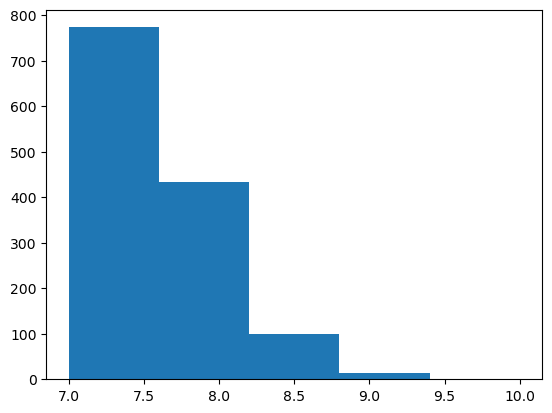

In [167]:
import matplotlib.pyplot as plt
plt.hist(movies["imdb_score"],bins=5,range=(7,10))
plt.show()

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [173]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies[movies["actor_1_name"]=="Meryl Streep"]

In [174]:
Leo_Caprio = movies[movies["actor_1_name"]=="Leonardo DiCaprio"]

In [175]:
Brad_Pitt = movies[movies["actor_1_name"]=="Brad Pitt"]

In [180]:
# Write your code for combining the three dataframes here
C = [Meryl_Streep,Leo_Caprio,Brad_Pitt]

In [182]:
Combined = pd.concat(C)

In [185]:
Combined

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
1925,Stephen Daldry,174.0,41.0,"[Drama, Romance]",Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,16.0,Drama,Romance
1575,Sydney Pollack,66.0,87.0,"[Biography, Drama, Romance]",Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.0,Biography,Romance
1204,Nora Ephron,252.0,94.0,"[Biography, Drama, Romance]",Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.0,Biography,Romance
1674,Carl Franklin,64.0,23.0,[Drama],Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,-7.0,Drama,Drama
3135,Robert Altman,211.0,20.0,"[Comedy, Drama, Music]",Meryl Streep,A Prairie Home Companion,19655,280.0,English,10.0,2006.0,6.8,683,10.0,Comedy,Music
1408,David Frankel,208.0,124.0,"[Comedy, Drama, Romance]",Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.0,Comedy,Romance
410,Nancy Meyers,187.0,112.0,"[Comedy, Drama, Romance]",Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.0,Comedy,Romance
2781,Phyllida Lloyd,331.0,29.0,"[Biography, Drama, History]",Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,16.0,Biography,History
1106,Curtis Hanson,42.0,46.0,"[Action, Adventure, Crime, Thriller]",Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.0,Action,Thriller
1618,David Frankel,234.0,63.0,"[Comedy, Drama, Romance]",Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.0,Comedy,Romance


In [187]:
# Write your code for grouping the combined dataframe here
Combined.groupby(["actor_1_name"]).mean(["num_critic_for_reviews"],["num_user_for_reviews"])

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,Profit
actor_1_name,,,,,,,,,
Brad Pitt,245.000000,65.882353,283583.823529,742.352941,69.294118,2004.352941,7.152941,14051.764706,-3.411765
Leonardo DiCaprio,330.190476,125.095238,441958.857143,914.476190,82.428571,2005.476190,7.495238,52190.476190,42.666667
Meryl Streep,181.454545,59.363636,73545.545455,297.181818,34.454545,2003.545455,6.745455,2934.090909,24.909091


In [198]:
# Write the code for finding the mean of critic reviews and audience reviews here
pivot = pd.pivot_table(data=Combined,index="actor_1_name",values=["num_critic_for_reviews","num_user_for_reviews"])
pivot

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


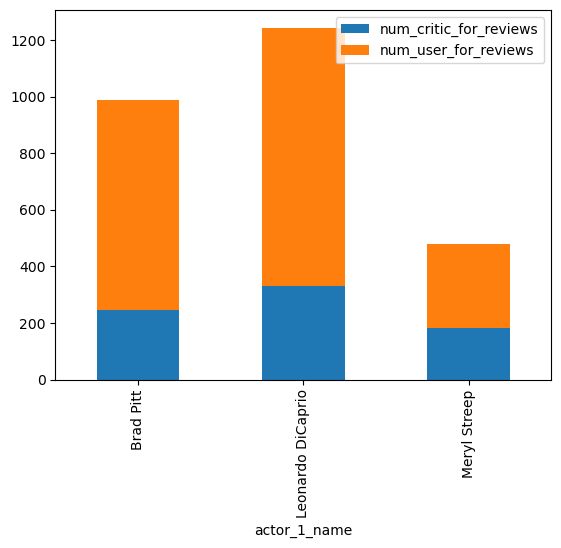

In [199]:
pivot.plot(kind="bar",stacked=True)
plt.show()

**Checkpoint 6:** `Leonardo` has aced both the lists!